# Read Image

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [2]:
# reads an input image
img = cv2.imread('/content/pout.jpg',0)

# Original Image

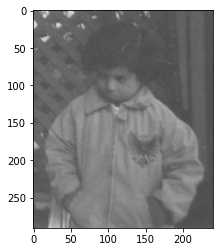

In [3]:
fname = '/content/pout.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()


# Histogram of Original Image

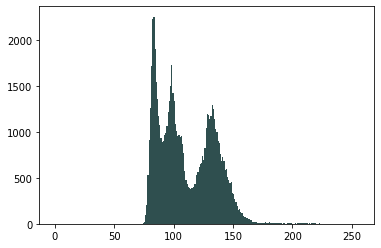

In [4]:
# # find frequency of pixels in range 0-255
# histr = cv2.calcHist([img],[0],None,[256],[0,256])

# alternative way to find histogram of an image
plt.hist(img.ravel(),256,[0,256],color='darkslategray')
plt.show()

# # show the plotting graph of an image
# plt.plot(histr,color='crimson')
# plt.show()

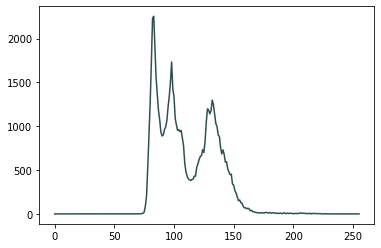

In [5]:
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr,color='darkslategray')
plt.show()

256


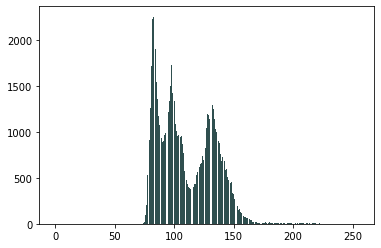

In [6]:
h = [(img==v).sum() for v in range(256)]
print(len(h) )
plt.figure()
plt.bar(range(256), h,color='darkslategray')
plt.show()

# Histogram with norm

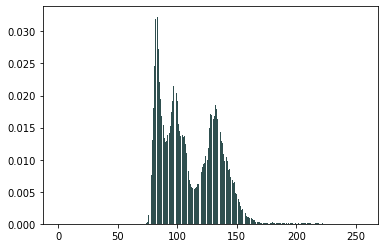

In [7]:
import numpy as np

h = np.array(h)
norm_h = h/h.sum()

plt.figure()
plt.bar(range(256), norm_h , color='darkslategray')
plt.show()

# Experiment-1_cumulative histogram

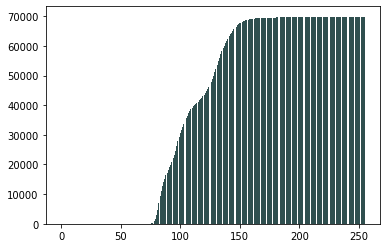

In [8]:

cumul_h = np.zeros((256,))
for i in range(256):
    cumul_h[i] = h[i]+cumul_h[i-1]

plt.figure()
plt.bar(range(256), cumul_h , color='darkslategray')
plt.show()

# cumulative histogram with norm

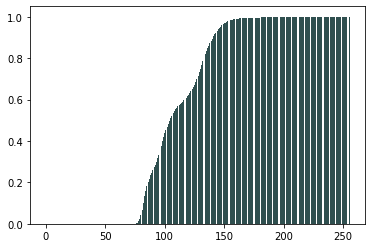

In [9]:
cumul_h_norm = np.zeros((256,))
for i in range(256):
    cumul_h_norm[i] = norm_h[i]+cumul_h_norm[i-1]

plt.figure()
plt.bar(range(256), cumul_h_norm , color='darkslategray')
plt.show()

# Histogram Equalization

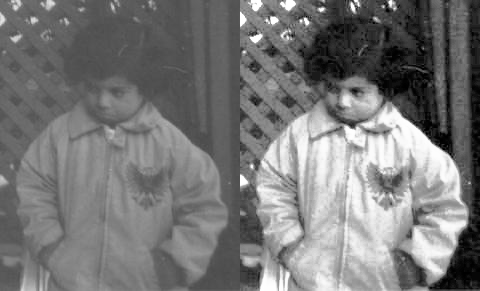

In [10]:
# import Opencv
import cv2
from google.colab.patches import cv2_imshow
# import Numpy
import numpy as np

# creating a Histograms Equalization of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img)

# stacking images side-by-side
res = np.hstack((img, equ))

# show image input vs output
cv2_imshow(res)

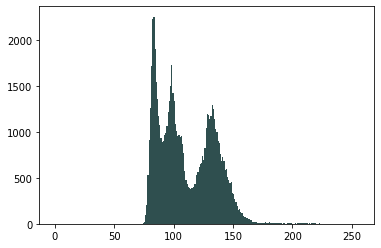

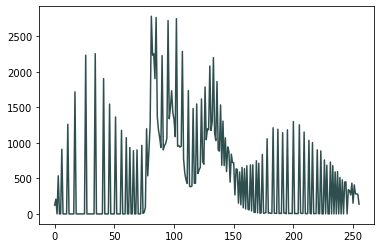

In [11]:
# find frequency of pixels in range 0-255
histo_equalization = cv2.calcHist([res],[0],None,[256],[0,256])

# alternative way to find histogram of an image
plt.hist(img.ravel(),256,[0,256], color='darkslategray')
plt.show()

# show the plotting graph of an image
plt.plot(histo_equalization, color='darkslategray')
plt.show()

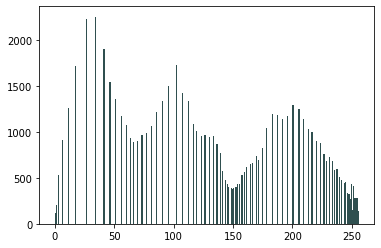

In [12]:
# alternative way to find histogram of an image
plt.hist(equ.ravel(),256,[0,256],color='darkslategray')
plt.show()

# cumulative equalization histogram

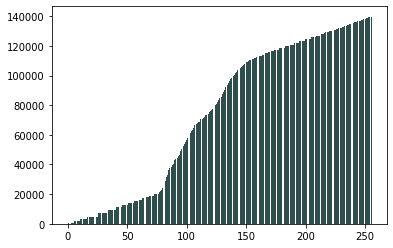

In [13]:
cumul_eq = np.zeros((256,))
for i in range(256):
    cumul_eq[i] = histo_equalization[i]+cumul_eq[i-1]

plt.figure()
plt.bar(range(256), cumul_eq , color='darkslategray')
plt.show()

# Experiment-2_The original image range

In [14]:
# Apply Min-Max Contrasting
min = np.min(img)
max = np.max(img)
print("Min of original image", min)
print("Max of orignial image", max)

Min of original image 72
Max of orignial image 229


# Contrast Stretched

In [15]:
# Create an empty array to store the final output
image_cs = np.zeros((img.shape[0],img.shape[1]),dtype = 'uint8')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        image_cs[i,j] = 255*(img[i,j]-min)/(max-min)

# Contrast Stretched Image

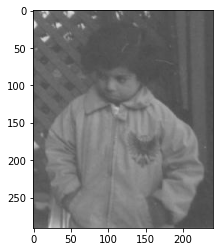

In [16]:
# Original Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

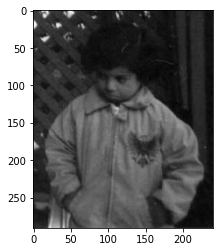

In [17]:
# Contrast Stretched Image
plt.imshow(cv2.cvtColor(image_cs, cv2.COLOR_BGR2RGB))

# Histogram of Contrast Stretched Image

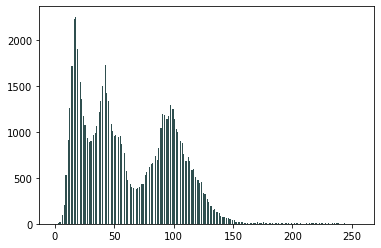

In [18]:
# alternative way to find histogram of an image
plt.hist(image_cs.ravel(),256,[0,256],color='darkslategray')
plt.show()

# The Contrast Stretched image range

In [19]:
# Apply Min-Max Contrasting
min = np.min(image_cs)
max = np.max(image_cs)
print("Min of Contrast Stretched image", min)
print("Max of Contrast Stretched image", max)

Min of Contrast Stretched image 0
Max of Contrast Stretched image 255
